In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [9]:
# Load the data
df = pd.read_csv('anonim-clean.csv')

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_anonimizat               48 non-null     int64  
 1   data internării             48 non-null     object 
 2   vârstă                      48 non-null     int64  
 3   gen                         48 non-null     object 
 4   prezentare                  47 non-null     object 
 5   app                         46 non-null     object 
 6   metodă imagistică           47 non-null     object 
 7   segment                     48 non-null     object 
 8   caracteristici imagistice   47 non-null     object 
 9   contrast                    48 non-null     bool   
 10  biopsie                     48 non-null     bool   
 11  diagnostic histopatologic   19 non-null     object 
 12  agent inflamator            19 non-null     object 
 13  tratament                   48 non-nu

# Analiza descriptivă a cohortei de pacienți

In [11]:
# Age statistics
age_stats = df['vârstă'].describe()
print("Age Statistics:")
print(age_stats)

Age Statistics:
count    48.000000
mean     63.500000
std      10.728764
min      39.000000
25%      54.750000
50%      65.500000
75%      71.250000
max      86.000000
Name: vârstă, dtype: float64


In [12]:
# Gender distribution
gender_counts = df['gen'].value_counts()
print("\nDistribuția pe Gen:")
print(gender_counts)


Distribuția pe Gen:
gen
m    30
f    18
Name: count, dtype: int64


In [13]:
# Imaging modality frequency
imaging_modalities = df['metodă imagistică'].str.split(', ', expand=True).stack().value_counts()
print("\nImaging Modality Frequency:")
print(imaging_modalities)


Imaging Modality Frequency:
irm    38
ct     24
rx     18
eco     5
Name: count, dtype: int64


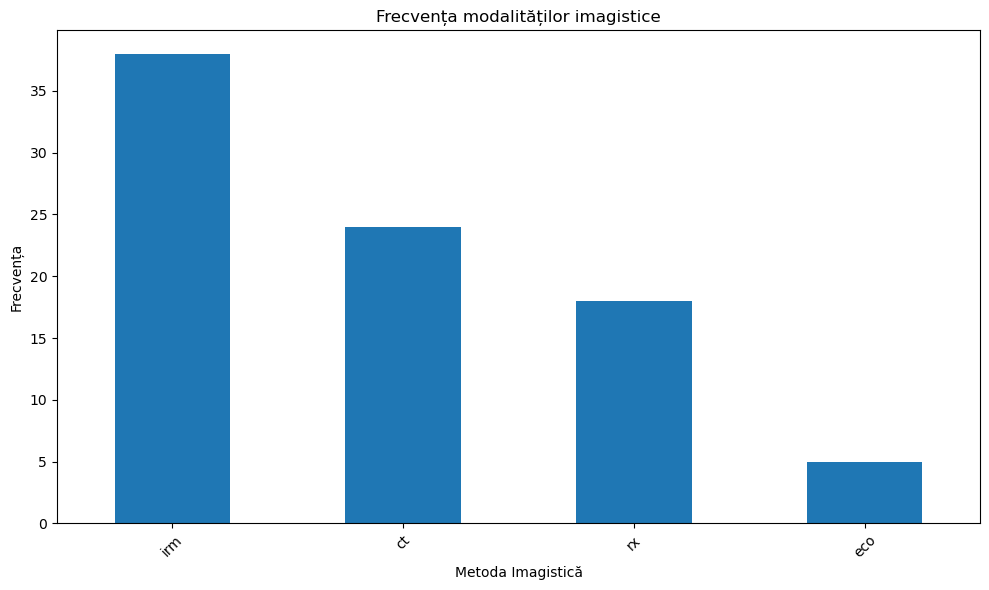

In [14]:
# 1. Bar chart for imaging modalities
plt.figure(figsize=(10, 6))
imaging_modalities.plot(kind='bar')
plt.title('Frecvența modalităților imagistice')
plt.xlabel('Metoda Imagistică')
plt.ylabel('Frecvența')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('imaging_modalities_bar.png')
plt.show()


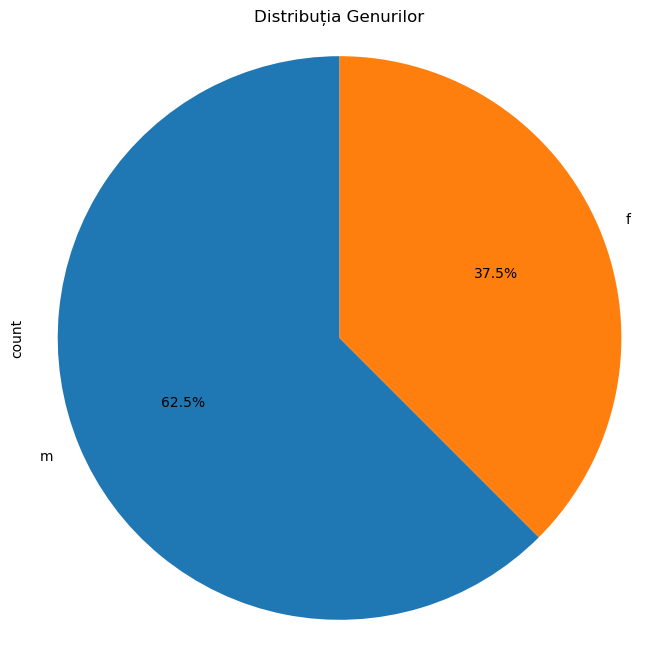

In [15]:
# 2. Pie chart for gender distribution
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuția Genurilor')
plt.axis('equal')
plt.savefig('gender_distribution_pie.png')
plt.show()

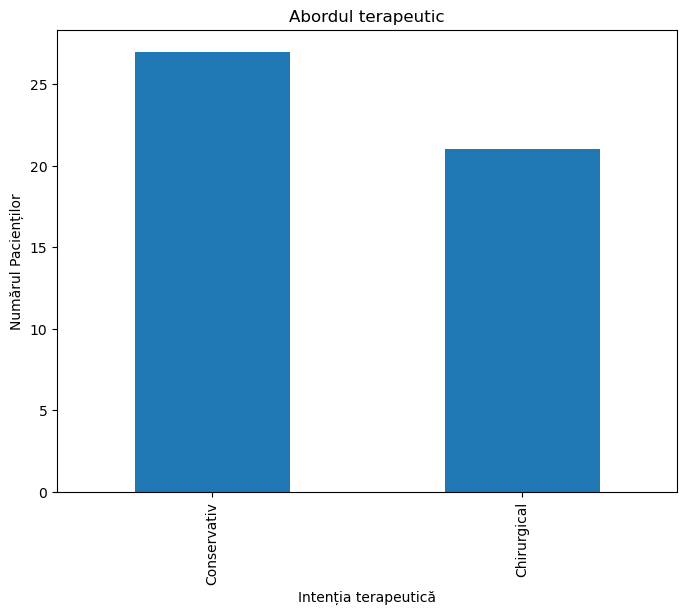

In [20]:
# 3. Bar chart for treatment approach (surgical vs conservative)
treatment_approach = df['tratament'].str.contains('chirurgical').map({True: 'Chirurgical', False: 'Conservativ'}).value_counts()
plt.figure(figsize=(8, 6))
treatment_approach.plot(kind='bar')
plt.title('Abordul terapeutic')
plt.xlabel('Intenția terapeutică')
plt.ylabel('Numărul Pacienților')
plt.savefig('treat-cons-sur.png')
plt.show()

# Corelarea între imagistică și evoluția clinică a pacienților cu spondilodiscită


Contingency table for eroziuni:
evoluție_binary  0   1
eroziuni              
0                1  11
1                6  27
Fisher's exact test p-value: 0.6548


<Figure size 1000x600 with 0 Axes>

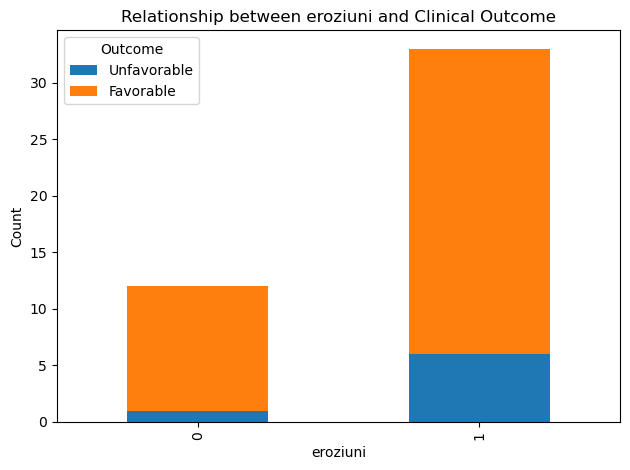


Contingency table for tasări:
evoluție_binary  0   1
tasări                
0                5  30
1                2   8
Fisher's exact test p-value: 0.6423


<Figure size 1000x600 with 0 Axes>

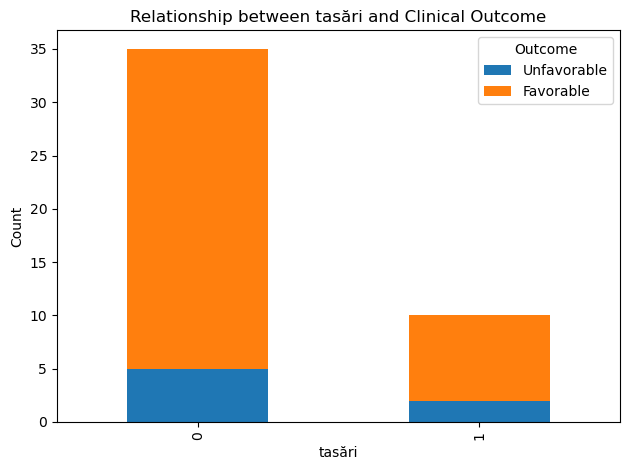


Contingency table for edem:
evoluție_binary  0   1
edem                  
0                3   8
1                4  30
Fisher's exact test p-value: 0.3368


<Figure size 1000x600 with 0 Axes>

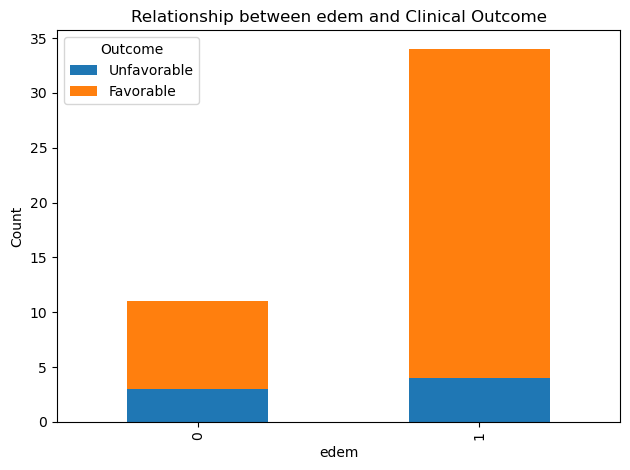


Contingency table for colecții:
evoluție_binary  0   1
colecții              
0                1  21
1                6  17
Fisher's exact test p-value: 0.0959


<Figure size 1000x600 with 0 Axes>

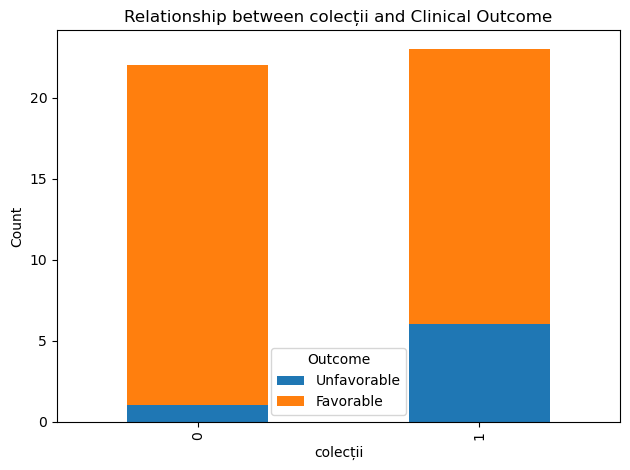


Contingency table for stenoză:
evoluție_binary  0   1
stenoză               
0                5  30
1                2   8
Fisher's exact test p-value: 0.6423


<Figure size 1000x600 with 0 Axes>

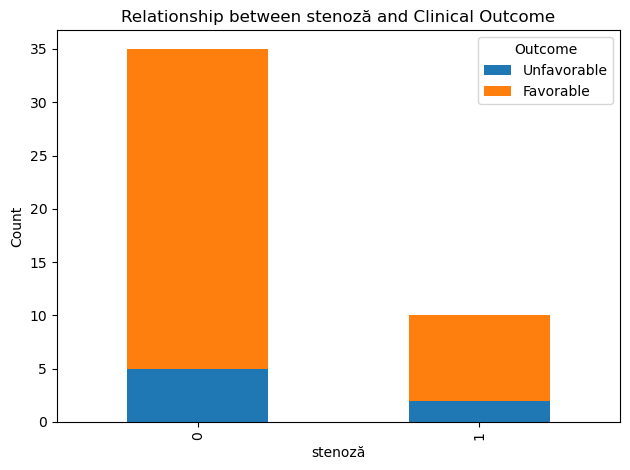

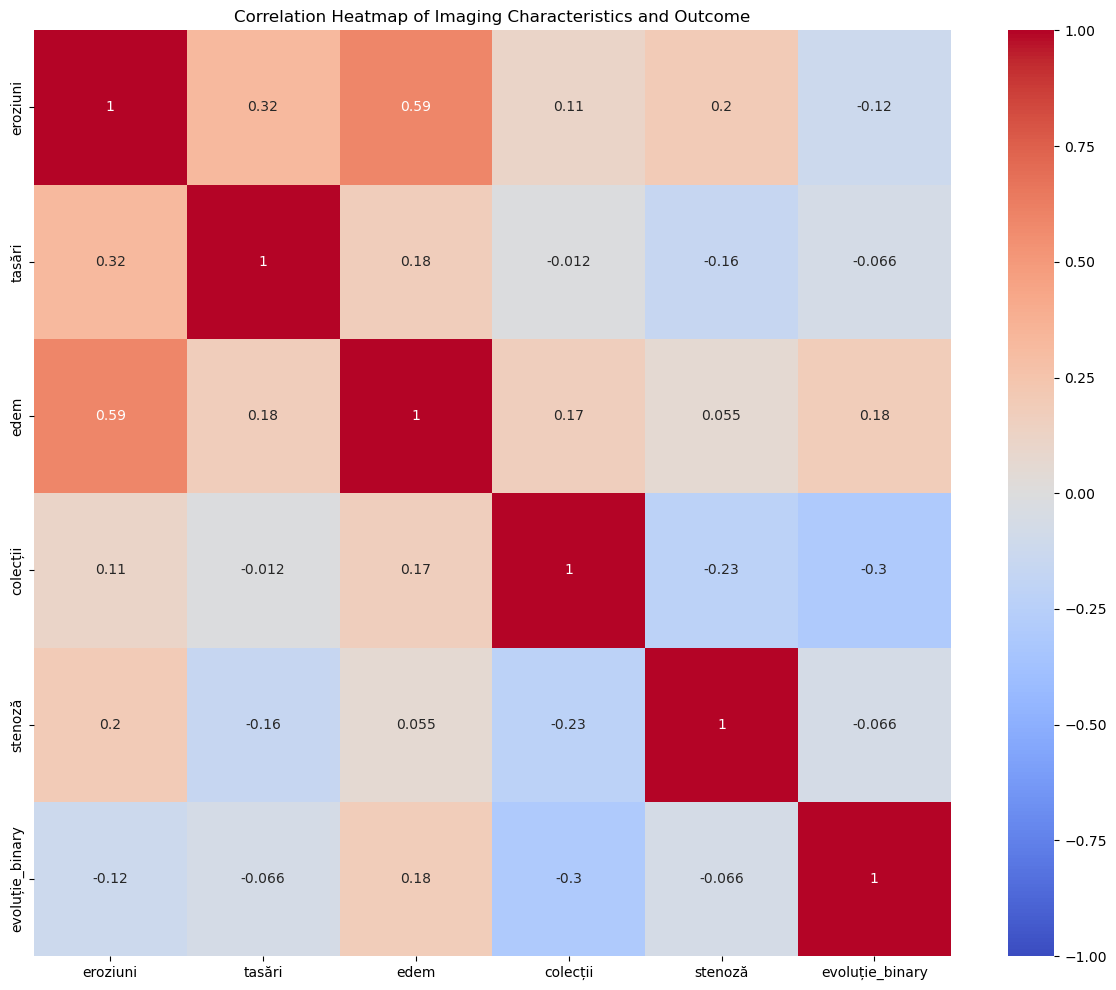


Contingency table for eroziuni and antibiotic_treatment:
antibiotic_treatment  0   1
eroziuni                   
0                     1  11
1                     2  31
Fisher's exact test p-value: 1.0000


<Figure size 1000x600 with 0 Axes>

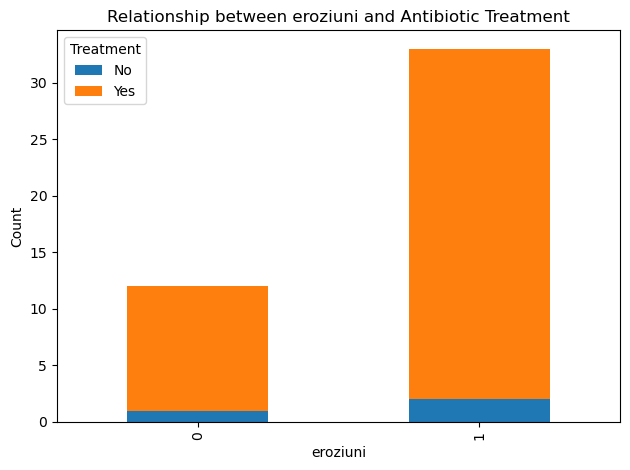


Contingency table for tasări and antibiotic_treatment:
antibiotic_treatment  0   1
tasări                     
0                     2  33
1                     1   9
Fisher's exact test p-value: 0.5388


<Figure size 1000x600 with 0 Axes>

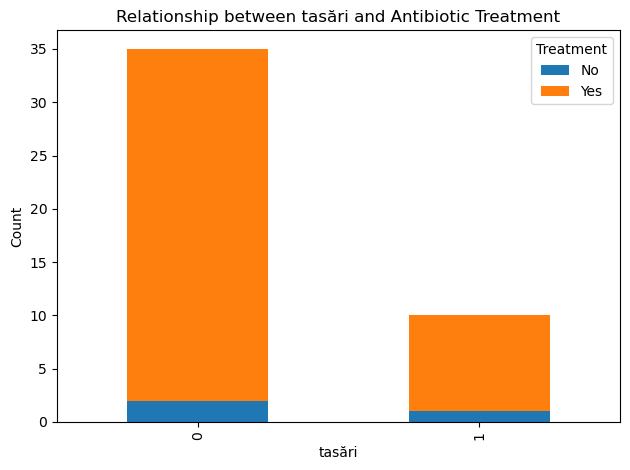


Contingency table for edem and antibiotic_treatment:
antibiotic_treatment  0   1
edem                       
0                     1  10
1                     2  32
Fisher's exact test p-value: 1.0000


<Figure size 1000x600 with 0 Axes>

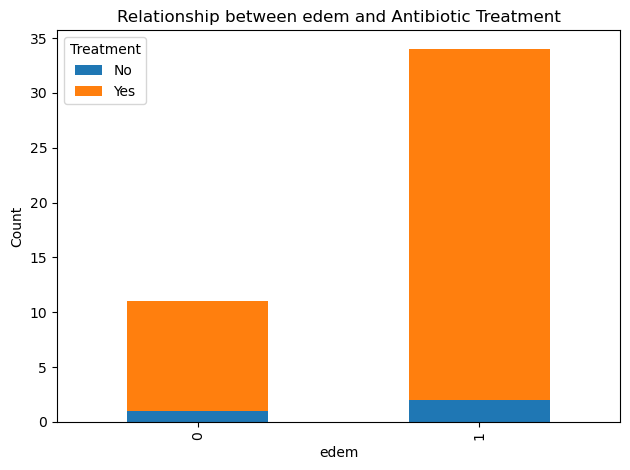


Contingency table for colecții and antibiotic_treatment:
antibiotic_treatment  0   1
colecții                   
0                     2  20
1                     1  22
Fisher's exact test p-value: 0.6078


<Figure size 1000x600 with 0 Axes>

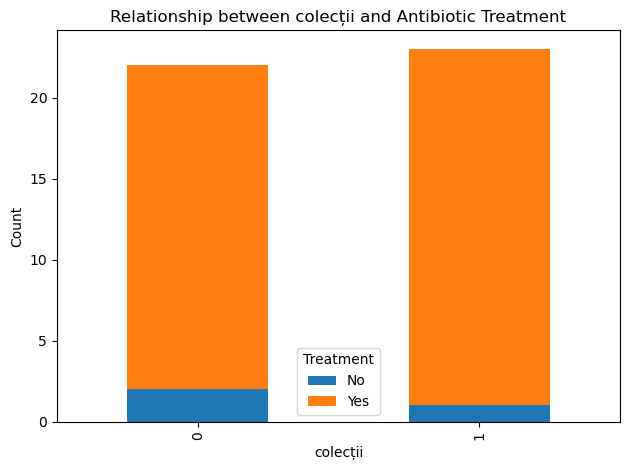


Contingency table for stenoză and antibiotic_treatment:
antibiotic_treatment  0   1
stenoză                    
0                     2  33
1                     1   9
Fisher's exact test p-value: 0.5388


<Figure size 1000x600 with 0 Axes>

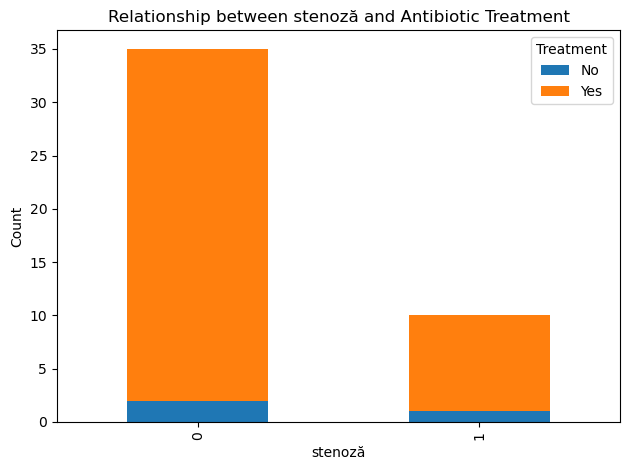


Contingency table for eroziuni and surgical_treatment:
surgical_treatment   0   1
eroziuni                  
0                    7   5
1                   18  15
Chi-square test p-value: 1.0000


<Figure size 1000x600 with 0 Axes>

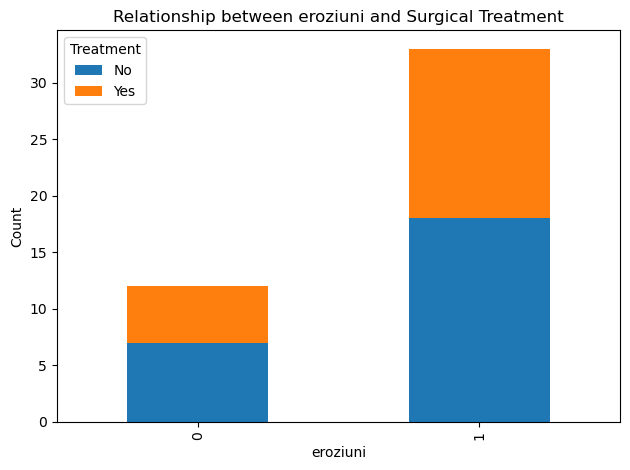


Contingency table for tasări and surgical_treatment:
surgical_treatment   0   1
tasări                    
0                   19  16
1                    6   4
Fisher's exact test p-value: 1.0000


<Figure size 1000x600 with 0 Axes>

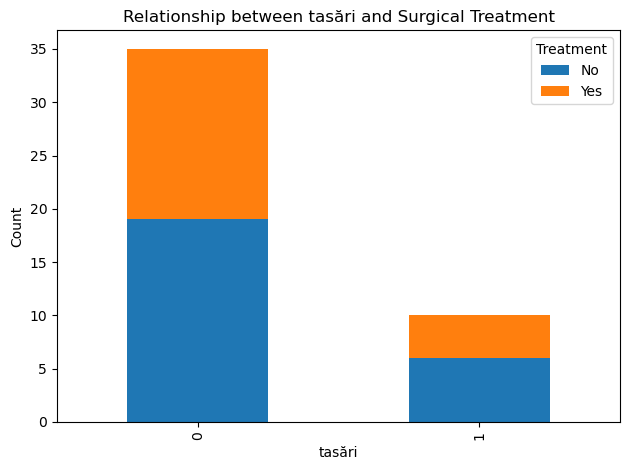


Contingency table for edem and surgical_treatment:
surgical_treatment   0   1
edem                      
0                    6   5
1                   19  15
Chi-square test p-value: 1.0000


<Figure size 1000x600 with 0 Axes>

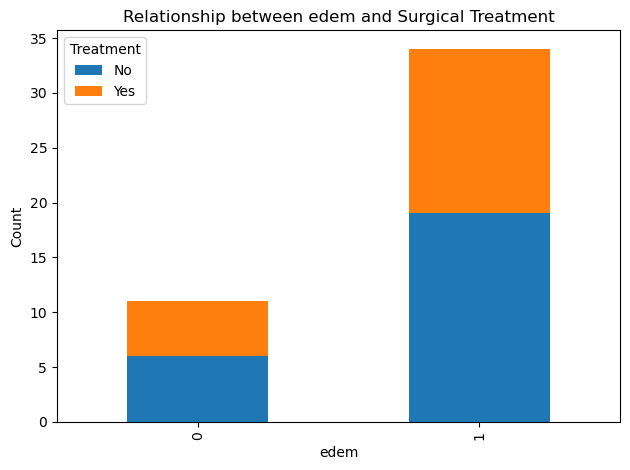


Contingency table for colecții and surgical_treatment:
surgical_treatment   0   1
colecții                  
0                   14   8
1                   11  12
Chi-square test p-value: 0.4432


<Figure size 1000x600 with 0 Axes>

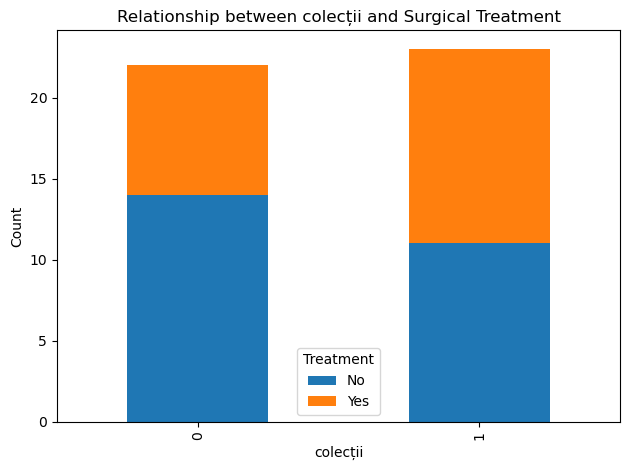


Contingency table for stenoză and surgical_treatment:
surgical_treatment   0   1
stenoză                   
0                   19  16
1                    6   4
Fisher's exact test p-value: 1.0000


<Figure size 1000x600 with 0 Axes>

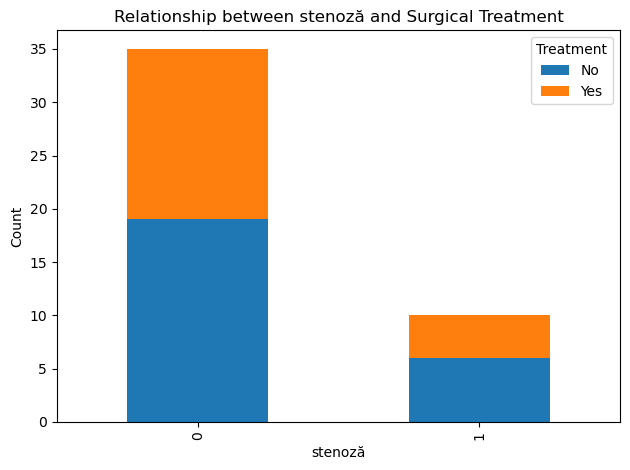

In [16]:
# Data Preprocessing
# Convert 'evoluție' to binary (0 for unfavorable, 1 for favorable)
df['evoluție_binary'] = df['evoluție'].map({'favorabilă': 1, 'lent_favorabilă': 1, 'nefavorabilă': 0})

# Extract imaging characteristics
imaging_chars = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză']
for char in imaging_chars:
    df[char] = df['caracteristici imagistice'].str.contains(char, na=False).astype(int)

# Function to perform Chi-square or Fisher's exact test
def contingency_test(feature, outcome):
    contingency = pd.crosstab(df[feature], df[outcome])
    if (contingency.values < 5).any():
        _, p_value = fisher_exact(contingency)
        test_type = "Fisher's exact test"
    else:
        _, p_value, _, _ = chi2_contingency(contingency)
        test_type = "Chi-square test"
    return contingency, p_value, test_type

# Analyze the relationship between imaging characteristics and clinical outcome
for char in imaging_chars:
    contingency, p_value, test_type = contingency_test(char, 'evoluție_binary')
    print(f"\nContingency table for {char}:")
    print(contingency)
    print(f"{test_type} p-value: {p_value:.4f}")

    # Visualize the relationship
    plt.figure(figsize=(10, 6))
    contingency.plot(kind='bar', stacked=True)
    plt.title(f'Relationship between {char} and Clinical Outcome')
    plt.xlabel(char)
    plt.ylabel('Count')
    plt.legend(title='Outcome', labels=['Unfavorable', 'Favorable'])
    plt.tight_layout()
    plt.show()

# Heatmap of imaging characteristics
plt.figure(figsize=(12, 10))
sns.heatmap(df[imaging_chars + ['evoluție_binary']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Imaging Characteristics and Outcome')
plt.tight_layout()
plt.show()

# # Logistic Regression
# # Drop rows with NaN values in 'evoluție_binary'
# df = df.dropna(subset=['evoluție_binary'])

# # Proceed with the existing code
# X = df[imaging_chars]
# y = df['evoluție_binary']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Print model coefficients
# for feature, coef in zip(imaging_chars, model.coef_[0]):
#     print(f"{feature}: {coef:.4f}")

# # Model evaluation
# y_pred = model.predict(X_test)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Analyze biological parameters
# bio_params = ['crp (0 - 1 mg/dl)', 'vsh (5 - 10 mm/h)', 'wbc * 10*3/ul (3.6 - 11.8)']

# for param in bio_params:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='evoluție', y=param, data=df)
#     plt.title(f'Distribution of {param} by Clinical Outcome')
#     plt.tight_layout()
#     plt.show()

#     # Perform Tukey's HSD test
#     tukey = pairwise_tukeyhsd(df[param], df['evoluție'])
#     print(f"\nTukey's HSD test for {param}:")
#     print(tukey)

# Additional analysis: Treatment decisions based on imaging
df['antibiotic_treatment'] = df['tratament'].str.contains('antibioterapie').astype(int)
df['surgical_treatment'] = df['tratament'].str.contains('chirurgical').astype(int)

for treatment in ['antibiotic_treatment', 'surgical_treatment']:
    for char in imaging_chars:
        contingency, p_value, test_type = contingency_test(char, treatment)
        print(f"\nContingency table for {char} and {treatment}:")
        print(contingency)
        print(f"{test_type} p-value: {p_value:.4f}")

        # Visualize the relationship
        plt.figure(figsize=(10, 6))
        contingency.plot(kind='bar', stacked=True)
        plt.title(f'Relationship between {char} and {treatment.replace("_", " ").title()}')
        plt.xlabel(char)
        plt.ylabel('Count')
        plt.legend(title='Treatment', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()

Tabel comasat de contingență:
  Caracteristică  Absent & Nefavorabil  Absent & Favorabil  \
0       eroziuni                     1                  11   
1         tasări                     5                  30   
2           edem                     3                   8   
3       colecții                     1                  21   
4        stenoză                     5                  30   

   Prezent & Nefavorabil  Prezent & Favorabil  
0                      6                   27  
1                      2                    8  
2                      4                   30  
3                      6                   17  
4                      2                    8  

Rezultate teste statistice:
  Caracteristică                 Test   p-value
0       eroziuni  Fisher's exact test  0.654819
1         tasări  Fisher's exact test  0.642315
2           edem  Fisher's exact test  0.336750
3       colecții  Fisher's exact test  0.095916
4        stenoză  Fisher's exact test  0

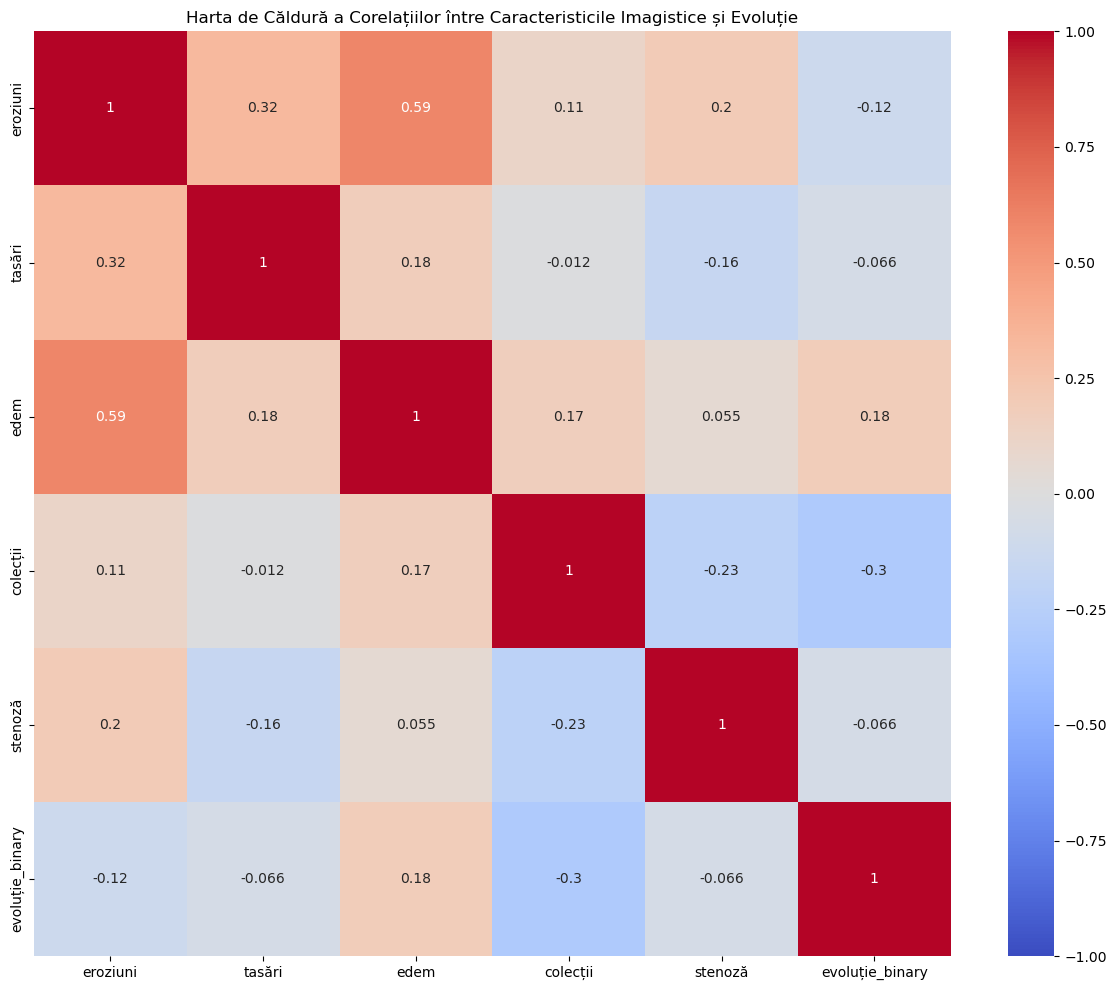


Tabel comasat de contingență pentru tratament:
  Caracteristică    Tratament  Absent & Fără Tratament  Absent & Cu Tratament  \
0       eroziuni   Antibiotic                        1                     11   
1         tasări   Antibiotic                        2                     33   
2           edem   Antibiotic                        1                     10   
3       colecții   Antibiotic                        2                     20   
4        stenoză   Antibiotic                        2                     33   
5       eroziuni  Chirurgical                        7                      5   
6         tasări  Chirurgical                       19                     16   
7           edem  Chirurgical                        6                      5   
8       colecții  Chirurgical                       14                      8   
9        stenoză  Chirurgical                       19                     16   

   Prezent & Fără Tratament  Prezent & Cu Tratament  
0     

In [18]:
# Inițializăm listele pentru a stoca rezultatele
contingency_tables = []
test_results = []
# Analizăm relația dintre caracteristicile imagistice și evoluția clinică
for char in imaging_chars:
    contingency, p_value, test_type = contingency_test(char, 'evoluție_binary')
    
    # Adăugăm tabelul de contingență la lista
    contingency_tables.append({
        'Caracteristică': char,
        'Absent & Nefavorabil': contingency.iloc[0, 0],
        'Absent & Favorabil': contingency.iloc[0, 1],
        'Prezent & Nefavorabil': contingency.iloc[1, 0],
        'Prezent & Favorabil': contingency.iloc[1, 1]
    })
    
    # Adăugăm rezultatul testului la lista
    test_results.append({
        'Caracteristică': char,
        'Test': test_type,
        'p-value': p_value
    })

# Creăm tabelele comasate
contingency_df = pd.DataFrame(contingency_tables)
test_results_df = pd.DataFrame(test_results)

# Afișăm tabelele comasate
print("Tabel comasat de contingență:")
print(contingency_df)
print("\nRezultate teste statistice:")
print(test_results_df)

# Vizualizăm relațiile folosind heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[imaging_chars + ['evoluție_binary']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Harta de Căldură a Corelațiilor între Caracteristicile Imagistice și Evoluție')
plt.tight_layout()
plt.show()

# Analiză suplimentară: Decizii de tratament bazate pe imagistică
df['tratament_antibiotic'] = df['tratament'].str.contains('antibioterapie', na=False).astype(int)
df['tratament_chirurgical'] = df['tratament'].str.contains('chirurgical', na=False).astype(int)

treatment_contingency_tables = []
treatment_test_results = []

for treatment in ['tratament_antibiotic', 'tratament_chirurgical']:
    for char in imaging_chars:
        contingency, p_value, test_type = contingency_test(char, treatment)
        
        # Adăugăm tabelul de contingență la lista
        treatment_contingency_tables.append({
            'Caracteristică': char,
            'Tratament': 'Antibiotic' if treatment == 'tratament_antibiotic' else 'Chirurgical',
            'Absent & Fără Tratament': contingency.iloc[0, 0],
            'Absent & Cu Tratament': contingency.iloc[0, 1],
            'Prezent & Fără Tratament': contingency.iloc[1, 0],
            'Prezent & Cu Tratament': contingency.iloc[1, 1]
        })
        
        # Adăugăm rezultatul testului la lista
        treatment_test_results.append({
            'Caracteristică': char,
            'Tratament': 'Antibiotic' if treatment == 'tratament_antibiotic' else 'Chirurgical',
            'Test': test_type,
            'p-value': p_value
        })

# Creăm tabelele comasate pentru tratament
treatment_contingency_df = pd.DataFrame(treatment_contingency_tables)
treatment_test_results_df = pd.DataFrame(treatment_test_results)

print("\nTabel comasat de contingență pentru tratament:")
print(treatment_contingency_df)
print("\nRezultate teste statistice pentru tratament:")
print(treatment_test_results_df)

## Discuții
se pare că nu există o corelație între evoluția clinică și imagistică a pacienților cu spondilodiscită. În plus, nu există o corelație între evoluția clinică și tipul de tratament administrat pacienților.

# Deprecated Code ↓  

In [ ]:
# Deprecated code →  moving to the end
# Function to safely check if a string contains a substring
def safe_contains(x, substr):
    return substr in str(x) if pd.notna(x) else False

# Imaging Findings Analysis
imaging_findings = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară']

for finding in imaging_findings:
    finding_present = df['caracteristici imagistice'].apply(lambda x: safe_contains(x, finding))
    outcome_favorable = df['evoluție'] == 'favorabilă'
    
    # Create a contingency table
    contingency = pd.crosstab(finding_present, outcome_favorable)
    
    print(f"\nContingency Table for {finding}:")
    print(contingency)

    # Calculate sensitivity and specificity
    TP = contingency.loc[True, True] if (True, True) in contingency.index else 0
    FP = contingency.loc[True, False] if (True, False) in contingency.index else 0
    TN = contingency.loc[False, False] if (False, False) in contingency.index else 0
    FN = contingency.loc[False, True] if (False, True) in contingency.index else 0
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")

# Imaging Modality Analysis
imaging_modalities = ['rm', 'ct', 'rx', 'eco']

modality_outcomes = {}

for modality in imaging_modalities:
    modality_present = df['metodă imagistică'].apply(lambda x: safe_contains(x, modality))
    favorable_outcomes = df.loc[modality_present, 'evoluție'] == 'favorabilă'
    modality_outcomes[modality] = favorable_outcomes.mean() if len(favorable_outcomes) > 0 else 0

plt.figure(figsize=(10, 6))
plt.bar(modality_outcomes.keys(), modality_outcomes.values())
plt.title('Proportion of Favorable Outcomes by Imaging Modality')
plt.xlabel('Imaging Modality')
plt.ylabel('Proportion of Favorable Outcomes')
plt.ylim(0, 1)
plt.savefig('imaging_modality_outcomes.png')
plt.close()

print("\nAnalysis complete. Check the generated PNG file for the imaging modality outcomes visualization.")

# Additional analysis: Most common imaging findings
all_findings = df['caracteristici imagistice'].str.split(', ', expand=True).stack()
finding_counts = all_findings.value_counts()

plt.figure(figsize=(12, 6))
finding_counts.plot(kind='bar')
plt.title('Frequency of Imaging Findings')
plt.xlabel('Imaging Finding')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('imaging_findings_frequency.png')
plt.close()

print("\nMost common imaging findings:")
print(finding_counts)
print("\nCheck the generated 'imaging_findings_frequency.png' for a visual representation.")

In [ ]:
# Deprecated code →  moving to the end
# Prepare the features (X) and target (y)
imaging_findings = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară']
X = pd.DataFrame({finding: df['caracteristici imagistice'].str.contains(finding) for finding in imaging_findings})
X['contrast'] = df['contrast']

# Choose the outcome you want to predict (e.g., 'recidivă' or 'exitus')
y = df['recidivă']

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_scaled, y)

# Print coefficients
print("Logistic Regression Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# 2. Analysis of inflammatory markers (CRP, VSH, WBC)

# Correct mapping for the markers with their exact column names
marker_columns = {
    'crp': 'crp (0 - 1 mg/dl)', 
    'vsh': 'vsh (5 - 10 mm/h)', 
    'wbc': 'wbc * 10*3/ul (3.6 - 11.8)'  # Adjusted to match your column name
}

# Function to perform statistical test and create plot
def analyze_marker(marker):
    column_name = marker_columns[marker]  # Get correct column name
    pre = df[column_name].dropna()
    post = df[df['reevaluare'] == True][column_name].dropna()
    
    print(f"\n{marker} Analysis:")
    print(f"Pre-treatment samples: {len(pre)}")
    print(f"Post-treatment samples: {len(post)}")
    
    # Perform Mann-Whitney U test instead of Wilcoxon
    statistic, p_value = stats.mannwhitneyu(pre, post, alternative='two-sided')
    print(f"Mann-Whitney U test:")
    print(f"Statistic: {statistic}, p-value: {p_value}")
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.boxplot([pre, post], labels=['Pre-treatment', 'Post-treatment'])
    plt.title(f'{marker} Pre vs Post Treatment')
    plt.ylabel(marker)
    plt.show()

# Analyze each marker
for marker in ['crp', 'vsh', 'wbc']:
    analyze_marker(marker)

# 3. Correlation between imaging characteristics and outcomes

# Create a correlation matrix with corrected column names
correlation_data = pd.DataFrame({
    'contrast': df['contrast'],
    'recidivă': df['recidivă'],
    'exitus': df['exitus'],
    'crp': df['crp (0 - 1 mg/dl)'],
    'vsh': df['vsh (5 - 10 mm/h)'],
    'wbc': df['wbc * 10*3/ul (3.6 - 11.8)']  # Corrected here
})

for finding in imaging_findings:
    correlation_data[finding] = df['caracteristici imagistice'].str.contains(finding)

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix: Imaging Characteristics vs Outcomes')
plt.tight_layout()
plt.show()


In [ ]:
# deprecated code

# Funcție pentru efectuarea testului Chi-pătrat și afișarea rezultatelor
def perform_chi_square(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Testul Chi-pătrat pentru {var1} și {var2}:")
    print(f"Valoarea Chi-pătrat: {chi2}")
    print(f"Valoarea p: {p_value}")
    print(f"Grade de libertate: {dof}")
    print("Tabel de contingență:")
    print(contingency_table)
    print("\n")
    
    # Vizualizare
    plt.figure(figsize=(12, 6))
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f"Relația dintre {var1} și {var2}")
    plt.xlabel(var1)
    plt.ylabel("Frecvență")
    plt.legend(title=var2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Prelucrăm caracteristicile imagistice și tratăm valorile NaN
caracteristici = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară']

for caracteristica in caracteristici:
    # Înlocuim NaN cu False și apoi convertim în întregi
    df[caracteristica] = df['caracteristici imagistice'].str.contains(caracteristica, na=False).astype(int)

# Analizăm relația dintre caracteristicile imagistice și tratament
df['tratament_chirurgical'] = df['tratament'].str.contains('chirurgical', na=False).astype(int)

# Analizăm relația dintre caracteristicile imagistice și evoluție
df['evolutie_favorabila'] = df['evoluție'].isin(['favorabilă', 'lent_favorabilă']).astype(int)

# Analizăm relația dintre caracteristicile imagistice și recidivă
for caracteristica in caracteristici:
    perform_chi_square(df, caracteristica, 'recidivă')

# Analiza multivariată pentru caracteristicile imagistice și tratamentul chirurgical
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[caracteristici]
y = df['tratament_chirurgical']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Raport de clasificare pentru predicția tratamentului chirurgical:")
print(classification_report(y_test, y_pred))

print("Coeficienții modelului de regresie logistică:")
for caracteristica, coef in zip(caracteristici, model.coef_[0]):
    print(f"{caracteristica}: {coef}")

In [ ]:
# deprecated code
from sklearn.utils import resample
import seaborn as sns
# Prelucrăm caracteristicile imagistice
caracteristici = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară']

for caracteristica in caracteristici:
    df[caracteristica] = df['caracteristici imagistice'].str.contains(caracteristica, na=False).astype(int)

# Pregătim datele pentru analiză
df['tratament_chirurgical'] = df['tratament'].str.contains('chirurgical', na= False).astype(int)
X = df[caracteristici]
y = df['tratament_chirurgical']

# Funcție pentru a obține coeficienții modelului
def get_coefficients(X, y):
    model = LogisticRegression(random_state=42)
    model.fit(X, y)
    return model.coef_[0]

# Efectuăm analiza de sensibilitate folosind bootstrap
n_iterations = 1000
n_samples = len(X)

# Inițializăm o matrice pentru a stoca rezultatele bootstrap
bootstrap_results = np.zeros((n_iterations, len(caracteristici)))

for i in range(n_iterations):
    # Generăm un eșantion bootstrap
    X_resampled, y_resampled = resample(X, y, n_samples=n_samples, random_state=i)
    
    # Obținem coeficienții pentru acest eșantion
    bootstrap_results[i, :] = get_coefficients(X_resampled, y_resampled)

# Calculăm intervalele de încredere de 95% pentru coeficienți
confidence_intervals = np.percentile(bootstrap_results, [2.5, 97.5], axis=0)

# Afișăm rezultatele
print("Intervale de încredere de 95% pentru coeficienții caracteristicilor imagistice:")
for i, caracteristica in enumerate(caracteristici):
    print(f"{caracteristica}: ({confidence_intervals[0, i]:.4f}, {confidence_intervals[1, i]:.4f})")

# Vizualizăm distribuția coeficienților
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(bootstrap_results, columns=caracteristici))
plt.title("Distribuția coeficienților pentru caracteristicile imagistice")
plt.ylabel("Valoarea coeficientului")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analiza de sensibilitate pentru diferite dimensiuni ale eșantionului
sample_sizes = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
sensitivity_results = []

for size in sample_sizes:
    n_samples = int(len(X) * size)
    X_sample, y_sample = resample(X, y, n_samples=n_samples, random_state=42)
    coefficients = get_coefficients(X_sample, y_sample)
    sensitivity_results.append(coefficients)

# Vizualizăm rezultatele analizei de sensibilitate
plt.figure(figsize=(12, 6))
sensitivity_df = pd.DataFrame(sensitivity_results, index=sample_sizes, columns=caracteristici)
sns.heatmap(sensitivity_df, annot=True, cmap="coolwarm", center=0)
plt.title("Analiza de sensibilitate: Coeficienți vs. Dimensiunea eșantionului")
plt.xlabel("Caracteristici imagistice")
plt.ylabel("Proporția eșantionului")
plt.tight_layout()
plt.show()

# Testăm robustețea rezultatelor prin adăugarea de zgomot
noise_levels = [0, 0.05, 0.1, 0.15, 0.2]
noise_results = []

for noise in noise_levels:
    X_noisy = X + np.random.normal(0, noise, X.shape)
    coefficients = get_coefficients(X_noisy, y)
    noise_results.append(coefficients)

# Vizualizăm rezultatele testului de robustețe
plt.figure(figsize=(12, 6))
noise_df = pd.DataFrame(noise_results, index=noise_levels, columns=caracteristici)
sns.heatmap(noise_df, annot=True, cmap="coolwarm", center=0)
plt.title("Analiza de robustețe: Coeficienți vs. Nivelul de zgomot")
plt.xlabel("Caracteristici imagistice")
plt.ylabel("Nivelul de zgomot")
plt.tight_layout()
plt.show()